Preprocessing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing():
    df = pd.read_csv("HomeC.csv")
    selected_cols = ["use [kW]", "Solar [kW]", "Furnace 1 [kW]", "Furnace 2 [kW]", "dewPoint", "apparentTemperature"]
    df = df[selected_cols]
    df.dropna(inplace=True)
    X = df.drop(columns="use [kW]")
    y = df["use [kW]"]
    X = X.to_numpy()
    y = y.to_numpy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return df, X_train, X_test, y_train, y_test

def simplepreprocessing():
    df = pd.read_csv("HomeC.csv")
    selected_cols = ["use [kW]", "Furnace 2 [kW]"]
    df = df[selected_cols]
    df.dropna(inplace=True)
    X = df.drop(columns="use [kW]")
    y = df["use [kW]"]
    X = X.to_numpy()
    y = y.to_numpy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return df, X_train, X_test, y_train, y_test

In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"Model: {model_name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print("="*50)

Multiple Linear Regression from scratch

In [3]:
# @title 1.2 - build linear model + learning update (gradient descent + learning rate)
class  LinearRegressionScratch:
    """
    Custom implementation of linear regression using gradient descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data using gradient descent.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # Initialize coefficients (slope) and intercept to zero or random small values
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        m = len(y)  # number of training examples

        for _ in range(self.n_iterations):
            # Calculate the predictions
            y_pred = self.predict(X)

            # Compute the residuals (errors)
            error = (y_pred - y)

            # Calculate the gradient for intercept (slope) and coefficients (slope)
            intercept_gradient = (1/m) * np.sum(error)
            coef_gradient = (1/m) * np.dot(X.T, error)

            # Update the parameters using the gradients
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

Data Preparation

In [51]:
df, X_train, X_test, y_train, y_test = preprocessing()
# vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
from sklearn.preprocessing import PolynomialFeatures
n_power = 3
poly_features = PolynomialFeatures(degree=n_power, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

C:\Users\Aphiw\AppData\Local\Temp\ipykernel_6908\4050609400.py:8: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


In [10]:
df_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin = simplepreprocessing()

C:\Users\Aphiw\AppData\Local\Temp\ipykernel_6908\4050609400.py:23: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


In [11]:
df_lin.corr()

,use [kW],Furnace 2 [kW]
use [kW],1.000000,0.489414
Furnace 2 [kW],0.489414,1.000000


In [30]:
df.corr()

,use [kW],Solar [kW],Furnace 1 [kW],Furnace 2 [kW],dewPoint,apparentTemperature
use [kW],1.000000,-0.131635,0.314776,0.489414,0.016040,0.005560
Solar [kW],-0.131635,1.000000,-0.020461,-0.107684,0.089664,0.093793
Furnace 1 [kW],0.314776,-0.020461,1.000000,0.240445,-0.301091,-0.308621
Furnace 2 [kW],0.489414,-0.107684,0.240445,1.000000,-0.233404,-0.242814
dewPoint,0.016040,0.089664,-0.301091,-0.233404,1.000000,0.900818
apparentTemperature,0.005560,0.093793,-0.308621,-0.242814,0.900818,1.000000


Model Training

In [63]:
lr, n_iterations = 0.1, 1000
multi_lin_reg_scratch = LinearRegressionScratch(lr, n_iterations)
multi_lin_reg_scratch.fit(X_train, y_train)

poly_sklearn = LinearRegressionScratch(0.001, 100)
poly_sklearn.fit(X_poly_train,y_train)

In [12]:
lr, n_iterations = 0.1, 1000
lin_reg_scratch = LinearRegressionScratch(lr, n_iterations)
lin_reg_scratch.fit(X_train_lin, y_train_lin)

Model Evaluating

In [64]:
evaluate_model(y_test, multi_lin_reg_scratch.predict(X_test), "Multiple Linear Regression")
evaluate_model(y_test, poly_sklearn.predict(X_poly_test), "Polynomial Regression")

Model: Multiple Linear Regression
R² Score: 0.3276
Mean Squared Error (MSE): 0.7465
Root Mean Squared Error (RMSE): 0.8640
Mean Absolute Error (MAE): 0.4849
Mean Absolute Percentage Error (MAPE): 247.20%
Model: Polynomial Regression
R² Score: 0.6222
Mean Squared Error (MSE): 0.4194
Root Mean Squared Error (RMSE): 0.6476
Mean Absolute Error (MAE): 0.3810
Mean Absolute Percentage Error (MAPE): 244.22%


In [13]:
evaluate_model(y_test_lin, lin_reg_scratch.predict(X_test_lin), "Simple Linear Regression")

Model: Simple Linear Regression
R² Score: 0.2383
Mean Squared Error (MSE): 0.8456
Root Mean Squared Error (RMSE): 0.9195
Mean Absolute Error (MAE): 0.5021
Mean Absolute Percentage Error (MAPE): 342.54%


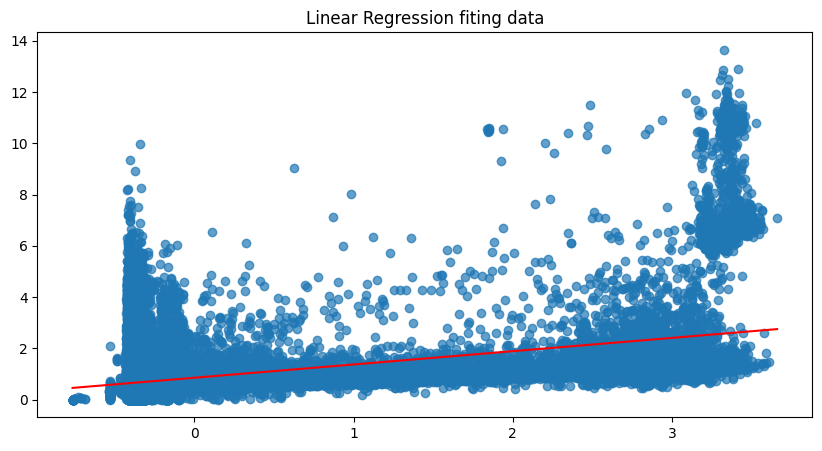

In [31]:
X_dummy = np.linspace(min(X_test_lin), max(X_test_lin), 1000)
y_lin = lin_reg_scratch.predict(X_dummy)

plt.figure(figsize=(10, 5))
plt.scatter(X_test_lin, y_test_lin, alpha=0.7)
plt.plot(X_dummy, y_lin, 'r-')
plt.title("Linear Regression fiting data")
plt.show()

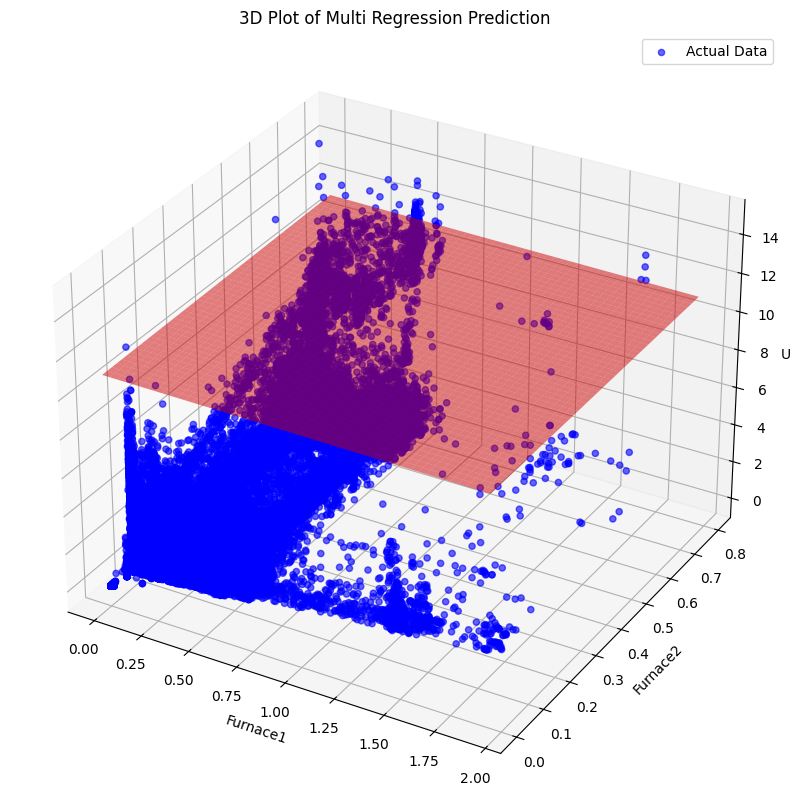

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

Furnace1 = df['Furnace 1 [kW]'].values
Furnace2 = df['Furnace 2 [kW]'].values
Solar = df['Solar [kW]'].values
dewPoint = df['dewPoint'].values
temp = df['apparentTemperature'].values
use = df['use [kW]'].values

X_plot = np.column_stack((Furnace1, Furnace2, Solar, dewPoint, temp))
y_plot = use

fix_values = X_plot.mean(axis=0)  # ค่าคงที่ของ Feature3, Feature4, Feature5
f1_range = np.linspace(Furnace1.min(), Furnace1.max(), 1000)
f2_range = np.linspace(Furnace2.min(), Furnace2.max(), 1000)
F1, F2 = np.meshgrid(f1_range, f2_range)

X_grid = np.column_stack((F1.ravel(), F2.ravel(), np.full_like(F1.ravel(), fix_values[2]), 
                          np.full_like(F1.ravel(), fix_values[3]), np.full_like(F1.ravel(), fix_values[4])))

predicted_use = multi_lin_reg_scratch.predict(X_grid)
predicted_use = predicted_use.reshape(F1.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot ของข้อมูลจริง
ax.scatter(Furnace1, Furnace2, use, color='blue', label='Actual Data', alpha=0.6)

# Plot prediction plane
ax.plot_surface(F1, F2, predicted_use, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Furnace1')
ax.set_ylabel('Furnace2')
ax.set_zlabel('Use')
ax.set_title('3D Plot of Multi Regression Prediction')

plt.legend()
plt.show()

In [60]:
poly_sklearn.predict(X_poly_test)

array([0.57843386, 0.70857374, 0.26809754, ..., 0.69848458, 0.6132395 ,
       0.7017354 ])

In [61]:
y_test

array([0.41886667, 0.62878333, 0.23141667, ..., 0.96455   , 1.40491667,
       0.43936667])

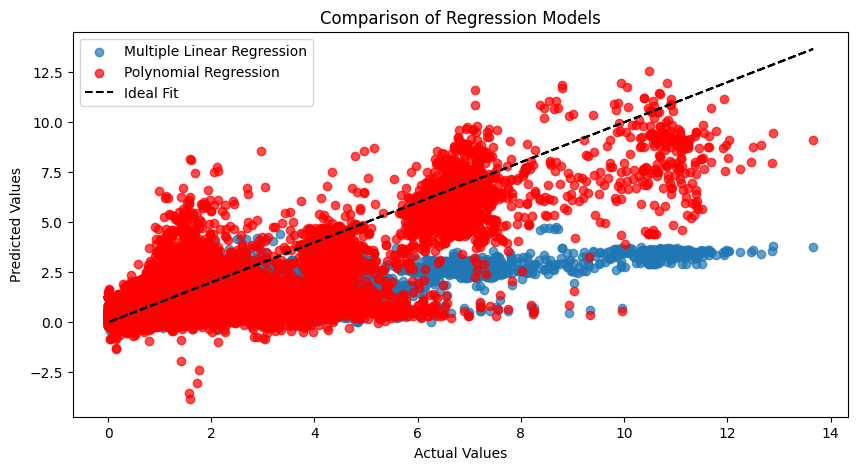

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, multi_lin_reg_scratch.predict(X_test), label="Multiple Linear Regression", alpha=0.7)
plt.scatter(y_test, poly_sklearn.predict(X_poly_test), label="Polynomial Regression", alpha=0.7, color="r")
plt.plot(y_test, y_test, 'k--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Regression Models")
plt.legend()
plt.show()